In [66]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from skimage.feature import hog, orb
from sklearn.metrics import confusion_matrix
import seaborn as sns
from skimage.feature import hog, orb
from skimage.feature import local_binary_pattern as lbp
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.utils import to_categorical

# Helper Functions

In [67]:
def imshow(image, title=None):
    plt.axis('off')
    plt.title(title)
    plt.imshow(image, 'gray')
    plt.show()
def showGridImage(images, labels, gsize=5,title=None):
    '''
    Function shows Multiple images.
    params: 
    images--> [Req] array of images flatten to 100*100
    labels --> [Req] array of labels (image class)
    gsize --> [opt, default=5] size for the grid gsize x gsize
    title --> [opt, default=None] title for the grid
    '''
    selected_indices = np.random.choice(len(images), size=gsize*gsize, replace=False)

    # Create a 5x5 grid for subplots
    fig, axes = plt.subplots(gsize,gsize, figsize=(10, 10))
    for i, ax in enumerate(axes.ravel()):
        index = selected_indices[i]
        image = images[index]
        label = labels[index]
        ax.imshow(image.reshape(100,100), 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"Image {classes[label]}")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Loading Dataset

In [68]:
mainPath = './Image Classification/'
classes = os.listdir(mainPath)
images = []
labels = []
for cls in classes:
    clsPath = os.path.join(mainPath,cls)
    for imgName in os.listdir(clsPath):
        imgPath = os.path.join(clsPath, imgName)
        image = cv2.imread(imgPath, 0)
        image = cv2.resize(image, (100,100))
        images.append(image.flatten())
        label = classes.index(cls)
        labels.append(label)

# Converting to numpy arrays

In [69]:
images = np.array(images)
labels = np.array(labels)

# Showing images from dataset

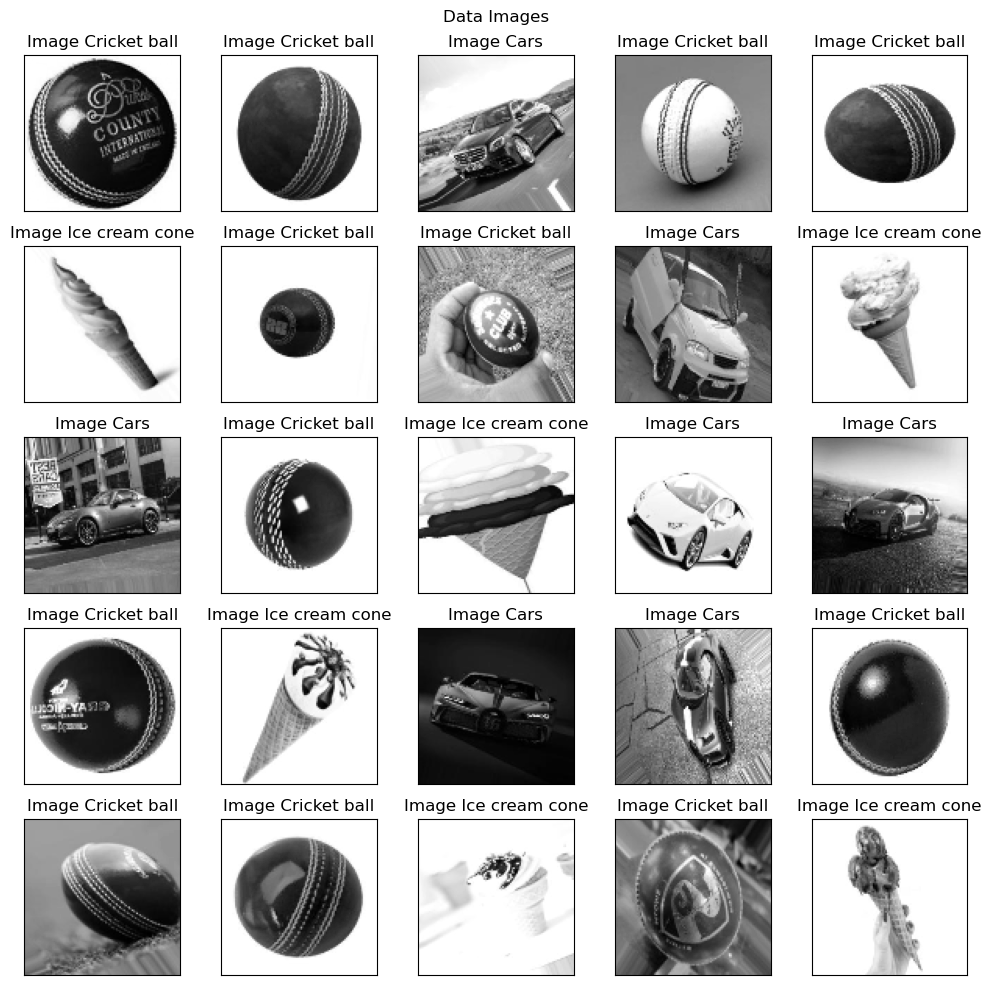

In [70]:
showGridImage(images,labels ,5, 'Data Images')

# Train_test_Split
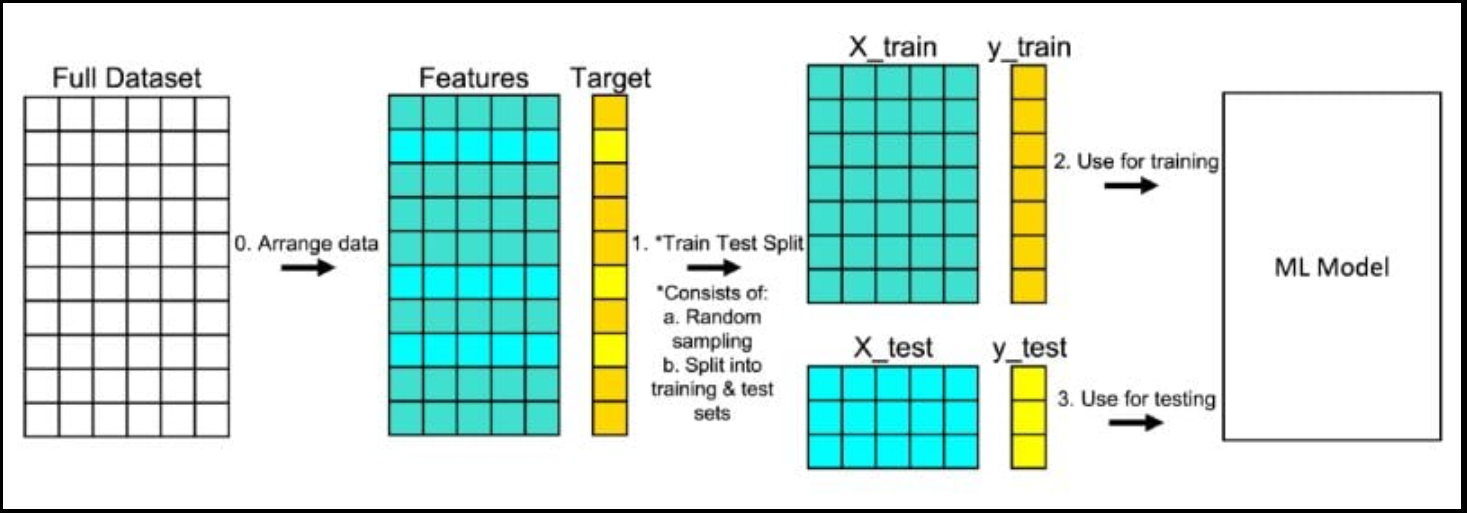

# Spliting into train and test

In [71]:
xTrain, xTest, yTrain, yTest = train_test_split(images, labels, test_size=0.2, random_state=0)

In [72]:
yTrain = to_categorical(yTrain)
yTest = to_categorical(yTest)

model = Sequential()
model.add(Dense(100, input_dim=10000, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 100)               1000100   
                                                                 
 dense_35 (Dense)            (None, 3)                 303       
                                                                 
Total params: 1,000,403
Trainable params: 1,000,403
Non-trainable params: 0
_________________________________________________________________


In [73]:
#training the model
history = model.fit(xTrain, yTrain, epochs=20, batch_size=64, validation_data=(xTest, yTest))

Epoch 1/20
13/13 [==============================] - 1s 30ms/step - loss: 1070.9868 - accuracy: 0.4398 - val_loss: 81.6885 - val_accuracy: 0.5859
Epoch 2/20
13/13 [==============================] - 0s 20ms/step - loss: 31.8928 - accuracy: 0.6084 - val_loss: 19.8650 - val_accuracy: 0.6515
Epoch 3/20
13/13 [==============================] - 0s 18ms/step - loss: 18.7356 - accuracy: 0.6502 - val_loss: 38.1405 - val_accuracy: 0.5505
Epoch 4/20
13/13 [==============================] - 0s 18ms/step - loss: 22.3577 - accuracy: 0.6603 - val_loss: 26.8873 - val_accuracy: 0.6515
Epoch 5/20
13/13 [==============================] - 0s 21ms/step - loss: 11.6593 - accuracy: 0.7313 - val_loss: 21.8032 - val_accuracy: 0.6313
Epoch 6/20
13/13 [==============================] - 0s 17ms/step - loss: 10.8783 - accuracy: 0.7516 - val_loss: 10.8832 - val_accuracy: 0.7020
Epoch 7/20
13/13 [==============================] - 0s 20ms/step - loss: 18.4440 - accuracy: 0.7034 - val_loss: 14.0023 - val_accuracy: 0.70

# Extracting  Features

In [74]:
mainPath = './Image Classification/'
classes = os.listdir(mainPath)
LPBFeaturesFlatten = []
LBPFeatures = []
labels = []
for cls in classes:
    clsPath = os.path.join(mainPath,cls)
    for imgName in os.listdir(clsPath):
        imgPath = os.path.join(clsPath, imgName)
        image = cv2.imread(imgPath, 0)
        image = cv2.resize(image, (100,100))
        lbpFeat = lbp(image, P=8, R=1, method='uniform')
        LBPFeatures.append(lbpFeat)
        LPBFeaturesFlatten.append(lbpFeat.flatten())
        label = classes.index(cls)
        labels.append(label)

In [75]:
features = np.array(LPBFeaturesFlatten)
labels = np.array(labels)

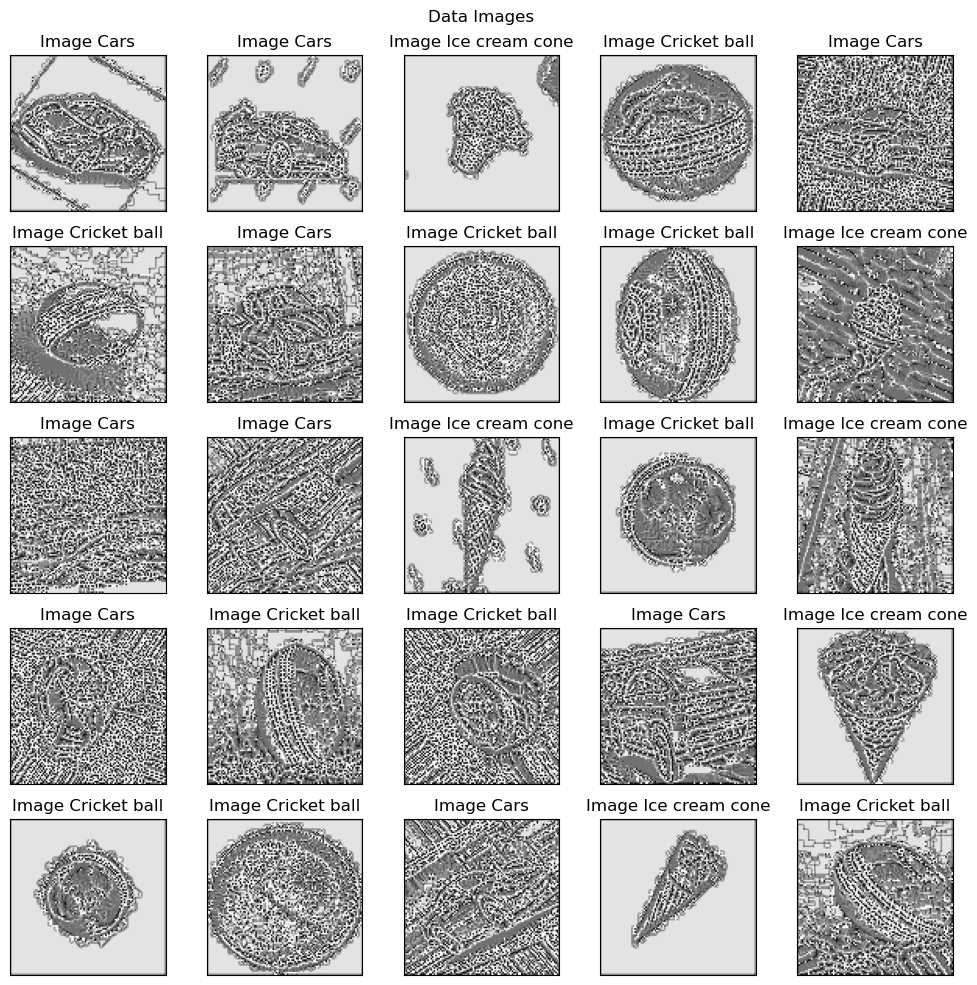

In [76]:
showGridImage(LBPFeatures,labels ,5, 'Data Images')

In [77]:
xTrain, xTest, yTrain, yTest = train_test_split(features, labels, test_size=0.2, random_state=0)
xTrainFeatures, xTestFeatures, yTrainFeatures, yTestFeatures = train_test_split(LBPFeatures, labels, test_size=0.2, random_state=0)

In [78]:
yTrain = to_categorical(yTrain)
yTest = to_categorical(yTest)

In [79]:
model = Sequential()
model.add(Dense(100, input_dim=100*100,activation='relu'))
model.add(Dense(3, activation='softmax'))


In [80]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 100)               1000100   
                                                                 
 dense_37 (Dense)            (None, 3)                 303       
                                                                 
Total params: 1,000,403
Trainable params: 1,000,403
Non-trainable params: 0
_________________________________________________________________


In [81]:
#training the model
history = model.fit(xTrain, yTrain, epochs=20, batch_size=64, validation_data=(xTest, yTest))

Epoch 1/20
13/13 [==============================] - 1s 31ms/step - loss: 76.9718 - accuracy: 0.3473 - val_loss: 13.5020 - val_accuracy: 0.3182
Epoch 2/20
13/13 [==============================] - 0s 21ms/step - loss: 11.1905 - accuracy: 0.3333 - val_loss: 10.1737 - val_accuracy: 0.3636
Epoch 3/20
13/13 [==============================] - 0s 17ms/step - loss: 6.1855 - accuracy: 0.4360 - val_loss: 6.5937 - val_accuracy: 0.3687
Epoch 4/20
13/13 [==============================] - 0s 16ms/step - loss: 3.5753 - accuracy: 0.5247 - val_loss: 3.1554 - val_accuracy: 0.4545
Epoch 5/20
13/13 [==============================] - 0s 16ms/step - loss: 2.5173 - accuracy: 0.5665 - val_loss: 2.2028 - val_accuracy: 0.6061
Epoch 6/20
13/13 [==============================] - 0s 16ms/step - loss: 1.4907 - accuracy: 0.6743 - val_loss: 1.5292 - val_accuracy: 0.6364
Epoch 7/20
13/13 [==============================] - 0s 16ms/step - loss: 0.9583 - accuracy: 0.7262 - val_loss: 1.5373 - val_accuracy: 0.5303
Epoch 8/2